In [1]:

import sys
print(sys.path)

import sys
sys.path.append('python\python310\lib\site-packages')





['c:\\Users\\astri\\class_work\\WeatherPy', 'c:\\Users\\astri\\anaconda3\\python311.zip', 'c:\\Users\\astri\\anaconda3\\DLLs', 'c:\\Users\\astri\\anaconda3\\Lib', 'c:\\Users\\astri\\anaconda3', '', 'c:\\Users\\astri\\anaconda3\\Lib\\site-packages', 'c:\\Users\\astri\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\astri\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\astri\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


In [35]:


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    #city_url = url + "appid=" + weather_api_key + "&q=" + city + "&q" units=imperial 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_max_temp_c = (city_max_temp -32) * (5/9)
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp_c,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | makokou
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | ta`u
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | san julian
Processing Record 13 of Set 1 | anna regina
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | chernyshevskiy
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | collie
Processing Record 18 of Set 1 | urucui
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ca mau
Processing Record 21 of Set 1 | stanley
Processing Record 22 of S

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()




City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [37]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.477778,72,31,6.89,PN,1712428394
1,port-aux-francais,-49.3500,70.2167,9.022222,94,100,34.67,TF,1712428394
2,makokou,0.5738,12.8642,22.000000,93,100,1.63,GA,1712428680
3,ushuaia,-54.8000,-68.3000,4.811111,65,75,32.21,AR,1712428680
4,margaret river,-33.9500,115.0667,15.300000,75,1,13.20,AU,1712428397


In [38]:
city_data_df.to_csv(r"C:\Users\astri\class_work\WeatherPy\cities.csv", index_label="City_ID")


In [53]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\astri\\class_work\\WeatherPy\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.477778,72,31,6.89,PN,1712428394
1,port-aux-francais,-49.3500,70.2167,9.022222,94,100,34.67,TF,1712428394
2,makokou,0.5738,12.8642,22.000000,93,100,1.63,GA,1712428680
3,ushuaia,-54.8000,-68.3000,4.811111,65,75,32.21,AR,1712428680
4,margaret river,-33.9500,115.0667,15.300000,75,1,13.20,AU,1712428397


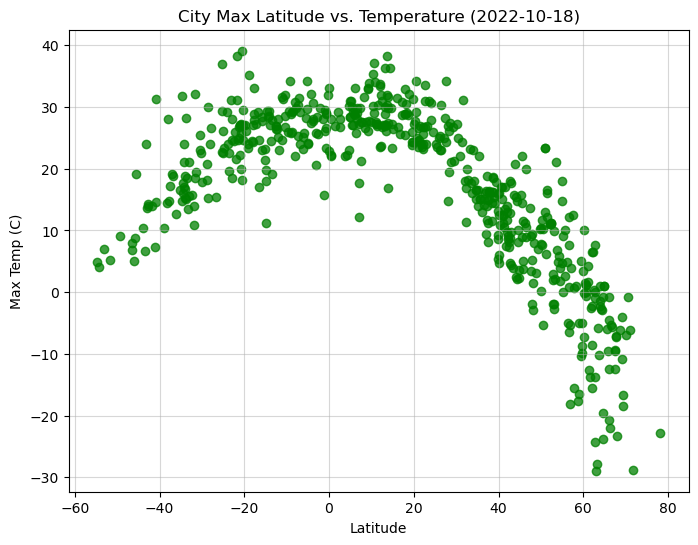

In [54]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6)) 

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='green', alpha=0.75)

plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

plt.grid(True, alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
save_path = r"C:\Users\astri\class_work\WeatherPy\Fig1.png"
plt.savefig(save_path)

# Show plot
plt.show()

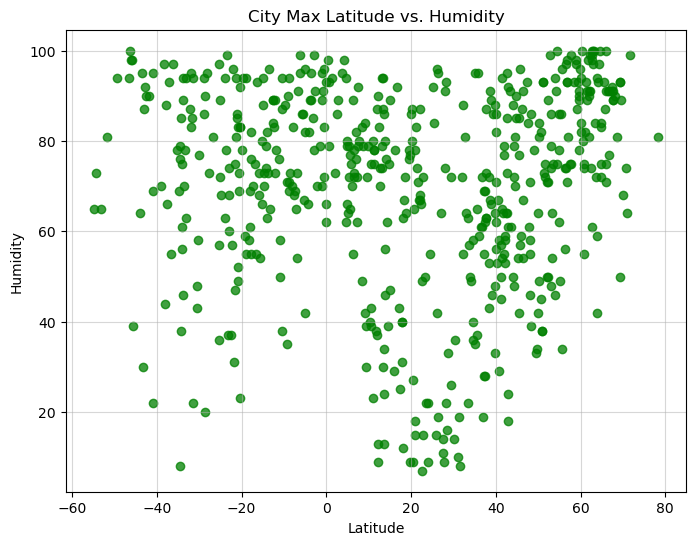

In [55]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(8,6)) 

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green', alpha=0.75)

plt.title('City Max Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.grid(True, alpha=0.5)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
save_path = r"C:\Users\astri\class_work\WeatherPy\Fig2.png"
plt.savefig(save_path)

# Show plot
plt.show()

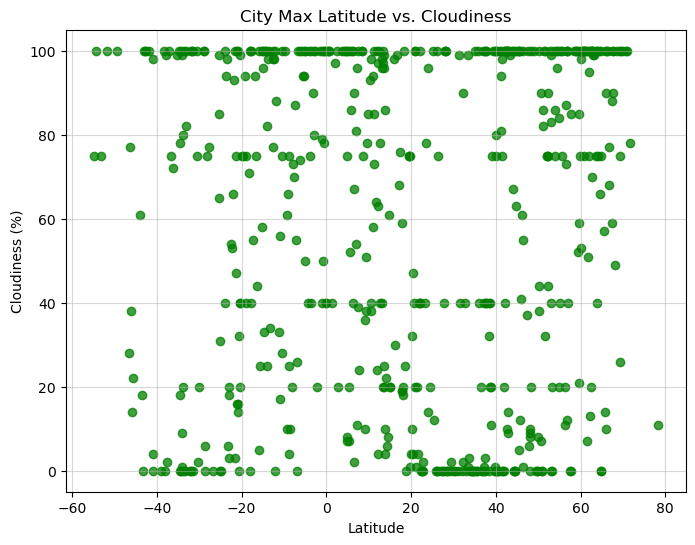

In [56]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(8,6)) 

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='green', alpha=0.75)

plt.title('City Max Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True, alpha=0.5)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
save_path = r"C:\Users\astri\class_work\WeatherPy\Fig3.png"
plt.savefig(save_path)

# Show plot
plt.show()

In [57]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


def plot_linear_regression(df, x_column, y_column):
    """
    
    """
   
    x_data = df[x_column]
    y_data = df[y_column]

    
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, color='skyblue', edgecolor='black', alpha=0.75)

    
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')

    # title and labels
    plt.title(f'{y_column} vs. {x_column} with Linear Regression', fontsize=14)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)

    #  legend
    plt.legend()

    # Show plot
    plt.show()

    # Print 
    print(f"Linear Regression: slope={slope:.2f}, intercept={intercept:.2f}, r-value={r_value:.2f}, p-value={p_value:.2f}, std_err={std_err:.2f}")



In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE



# Filter the DataFrame for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]



# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,makokou,0.5738,12.8642,22.000000,93,100,1.63,GA,1712428680
8,thompson,55.7435,-97.8558,10.088889,34,75,9.22,CA,1712428394
10,san julian,21.0167,-102.1667,26.600000,15,100,14.74,MX,1712428681
11,anna regina,7.2644,-58.5077,29.777778,62,96,8.01,GY,1712428681
12,happy valley-goose bay,53.3168,-60.3315,2.172222,64,20,3.44,CA,1712428681


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0] 
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.477778,72,31,6.89,PN,1712428394
1,port-aux-francais,-49.3500,70.2167,9.022222,94,100,34.67,TF,1712428394
3,ushuaia,-54.8000,-68.3000,4.811111,65,75,32.21,AR,1712428680
4,margaret river,-33.9500,115.0667,15.300000,75,1,13.20,AU,1712428397
5,ta`u,-14.2336,-169.5144,28.450000,74,100,5.68,AS,1712428681


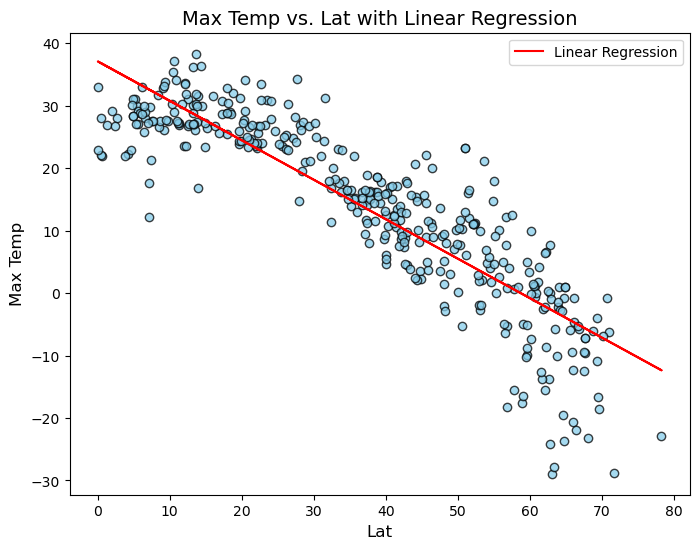

Linear Regression: slope=-0.63, intercept=37.12, r-value=-0.88, p-value=0.00, std_err=0.02


In [61]:
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp')

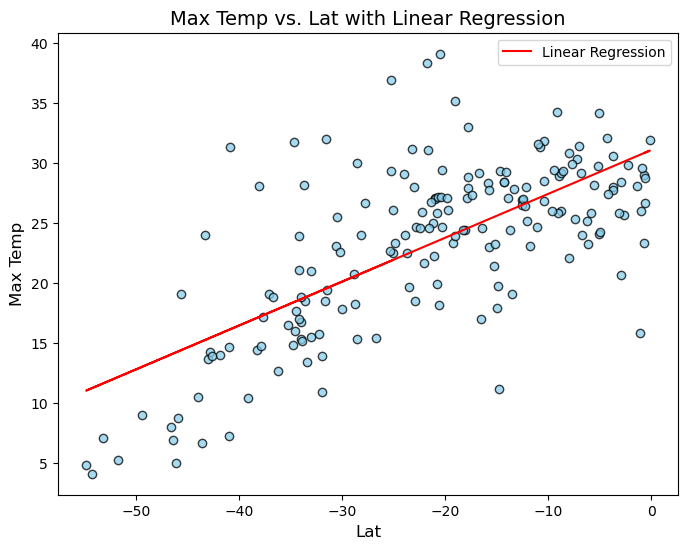

Linear Regression: slope=0.37, intercept=31.08, r-value=0.69, p-value=0.00, std_err=0.03


In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp')

In [ ]:
#Discussion: 
#Accoriding to the data there appears to be a strong correlation between the temperatures reached and the latitude for northern and southern hemispheres. The correlation is stronger for 
#the Northern hemisphere compared to the Southern hemisphere. 

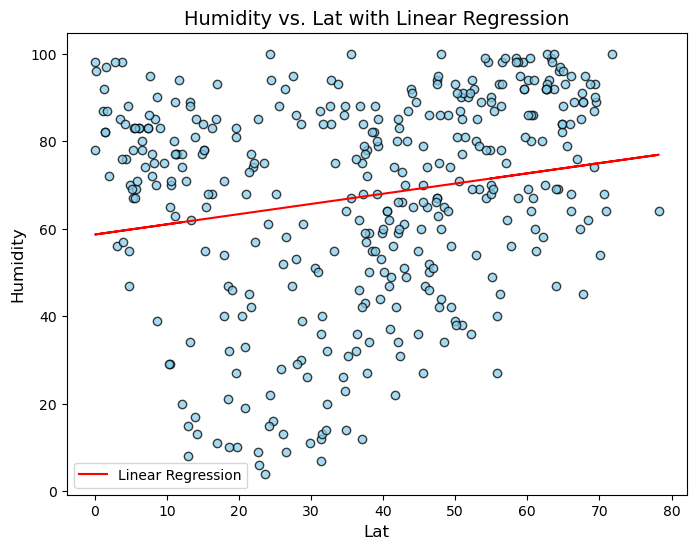

Linear Regression: slope=0.23, intercept=58.67, r-value=0.19, p-value=0.00, std_err=0.06


In [49]:
# Northern Hemisphere
# YOUR CODE HERE

#HUmidity vs. Latitude linear regression 

plot_linear_regression(northern_hemisphere_df, 'Lat', 'Humidity')

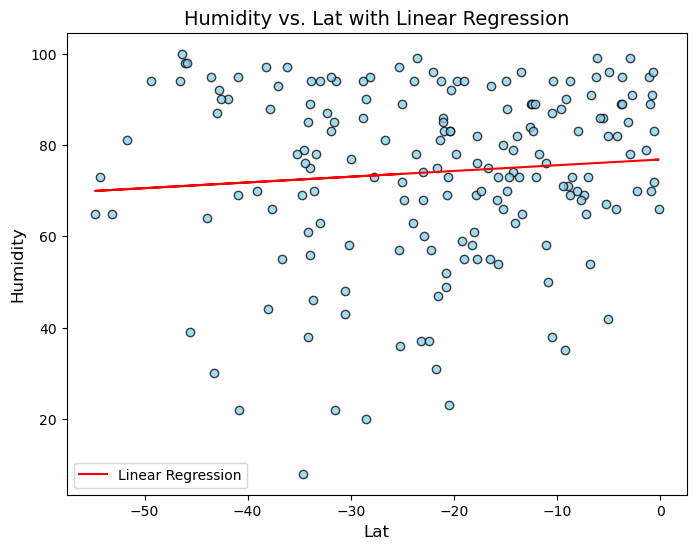

Linear Regression: slope=0.13, intercept=76.83, r-value=0.09, p-value=0.23, std_err=0.11


In [63]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity')

In [ ]:
#Discussion 

#When looking at the correlation for the Northern and Southern hemispheres in relation to humidity, there appears to be no correlation. 

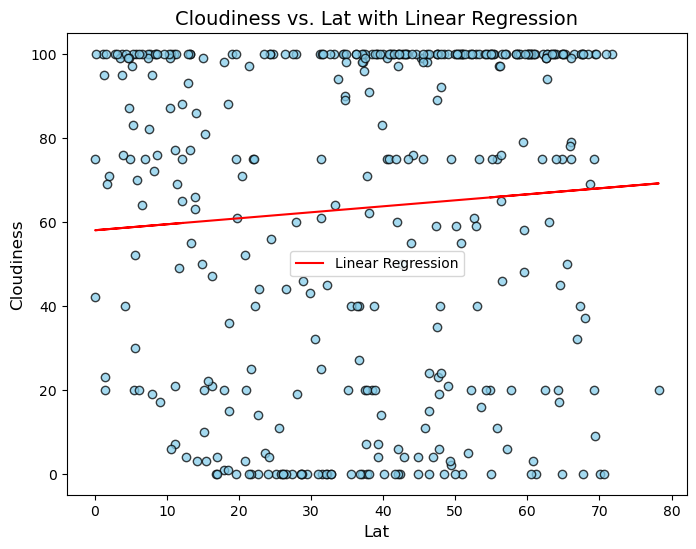

Linear Regression: slope=0.14, intercept=57.97, r-value=0.07, p-value=0.16, std_err=0.10


In [64]:
# Northern Hemisphere
# YOUR CODE HERE
#cloudiness vs. latitude 
plot_linear_regression(northern_hemisphere_df, 'Lat', 'Cloudiness')

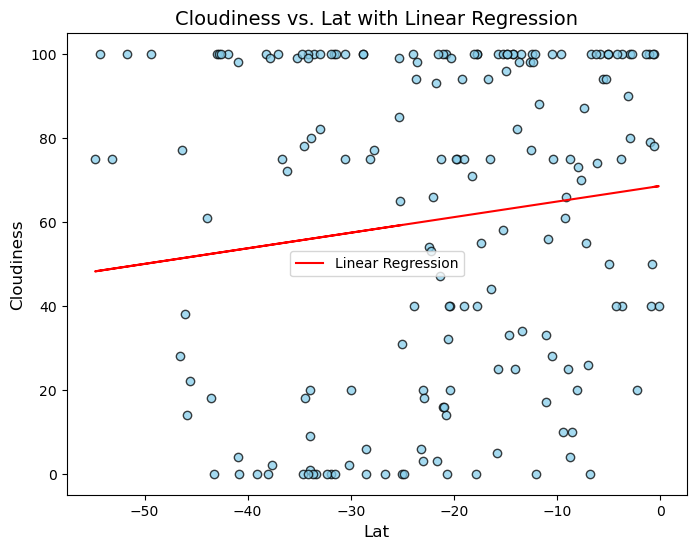

Linear Regression: slope=0.37, intercept=68.51, r-value=0.13, p-value=0.08, std_err=0.21


In [65]:
#southern hemisphere 

#cloudiness vs. latitude 

plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness')

In [ ]:
#Discussion 
#There is no correlation between cloudiness and the latitude when looking at Northern and Southern hemispheres. 

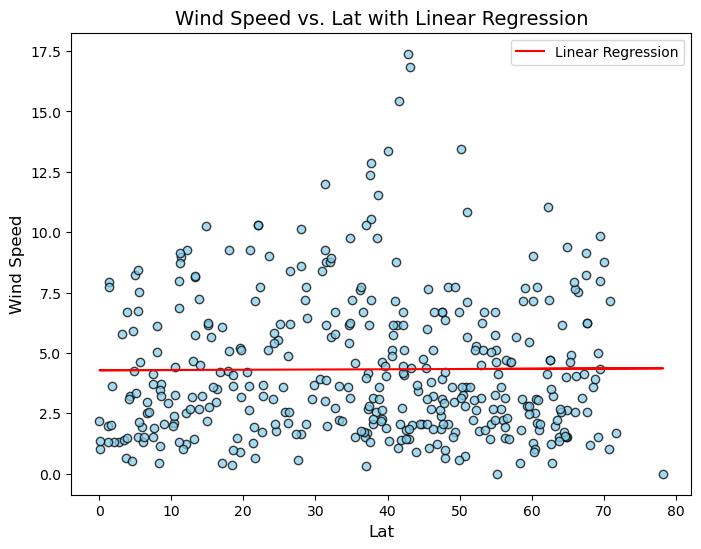

Linear Regression: slope=0.00, intercept=4.28, r-value=0.01, p-value=0.89, std_err=0.01


In [66]:
#wind speed vs. latitude 

# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemisphere_df, 'Lat', 'Wind Speed')

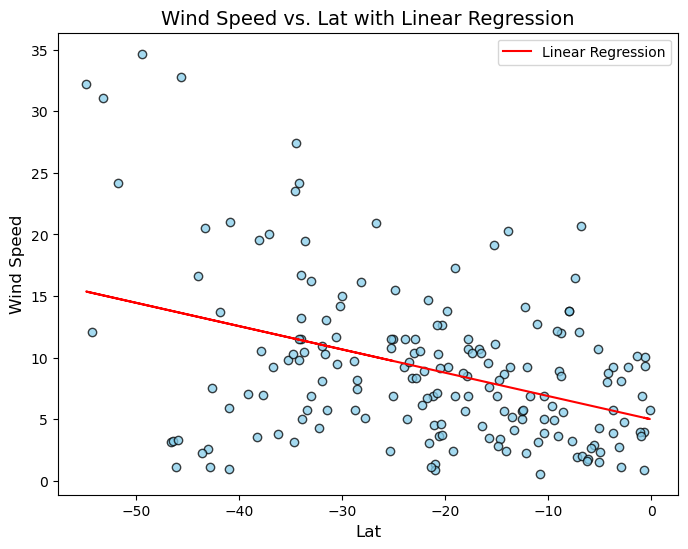

Linear Regression: slope=-0.19, intercept=4.99, r-value=-0.39, p-value=0.00, std_err=0.03


In [68]:
#wind speed vs. latitude
#southern hemisphere 
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed')

In [ ]:
#Discussion 
#When looking at wind speed, there is a stronger correlation for the Southern Hemisphere than the Northern Hemisphere. 